In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4617,ham,Nvm... I'm going to wear my sport shoes anyway...,NaN,NaN,NaN
2576,ham,In sch but neva mind u eat 1st lor..,NaN,NaN,NaN
4564,ham,Honeybee Said: *I'm d Sweetest in d World* God...,NaN,NaN,NaN
4896,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
1245,ham,Hello which the site to download songs its urg...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1) Data Cleaning
# 2) EDA
# 3) Text Preprocessing
# 4) Model building
# 5) Evaluation
# 6)Improvement
# 7) Website
# 8) Deploy

 ## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
894,ham,Doesn't g have class early tomorrow and thus s...
4685,ham,But pls dont play in others life.
4680,ham,Are you staying in town ?
2903,ham,HI DARLIN I HOPE YOU HAD A NICE NIGHT I WISH I...
237,ham,Where are you?when wil you reach here?


In [9]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
df.sample(5)

,Target,Text
3002,ham,I will see in half an hour
5031,ham,Ok i vl..do u know i got adsense approved..
744,ham,Men like shorter ladies. Gaze up into his eyes.
2211,ham,Just gettin a bit arty with my collages at the...
3265,ham,tap & spile at seven. * Is that pub on gas st ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
# It converts label values to numerical values
df['Target']=encoder.fit_transform(df['Target'])

In [13]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

403

In [16]:
#remove the duplicates it is used to remove duplicates from pandas
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA

In [19]:
df.head(5)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

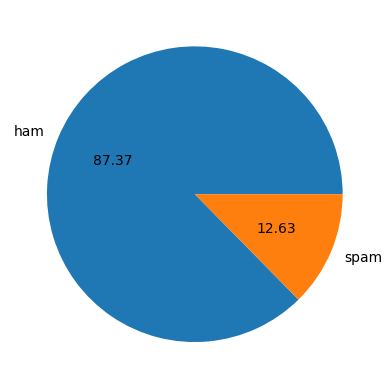

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
#data is imbalanced

In [23]:
import nltk

In [24]:
#Punkt is a pre-trained model for tokenization.
#It splits a text into:
#Sentences: Sentence tokenization sent_tokenize()
#Words: Word tokenization word_tokenize()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters']=df['Text'].apply(len)

In [26]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
from nltk.tokenize import word_tokenize




In [28]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

# Apply tokenizer to your dataframe's 'Text' column
df['Text'].apply(lambda x: tokenizer.tokenize(x))


0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that., So, .....
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                    [Rofl., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [29]:
df.head(5)

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# Define a simple function to count sentences
def count_sentences(text):
    # Split on common sentence endings (., !, ?)
    # Handle cases with multiple punctuation marks (e.g., "!!", "...")
    sentences = [s.strip() for s in text.replace('...', '.').replace('!!', '!').replace('??', '?').split('.') if s.strip()]
    return len(sentences)

# Add sentence count to DataFrame
df['num_sentences'] = df['Text'].apply(count_sentences)

# Display the first few rows to verify
df.head()

,Target,Text,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,3
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [31]:
# Add word count to DataFrame
df['num_words'] = df['Text'].apply(lambda x: len(x.split()))

# Now we can get the descriptive statistics for all three columns
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.000387
std,58.236293,11.068488,1.426610
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,30.000000


In [32]:
#ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.872896
std,56.358207,11.116240,1.352005
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,30.000000


In [33]:
#spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.882083
std,30.137753,5.967672,1.607078
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

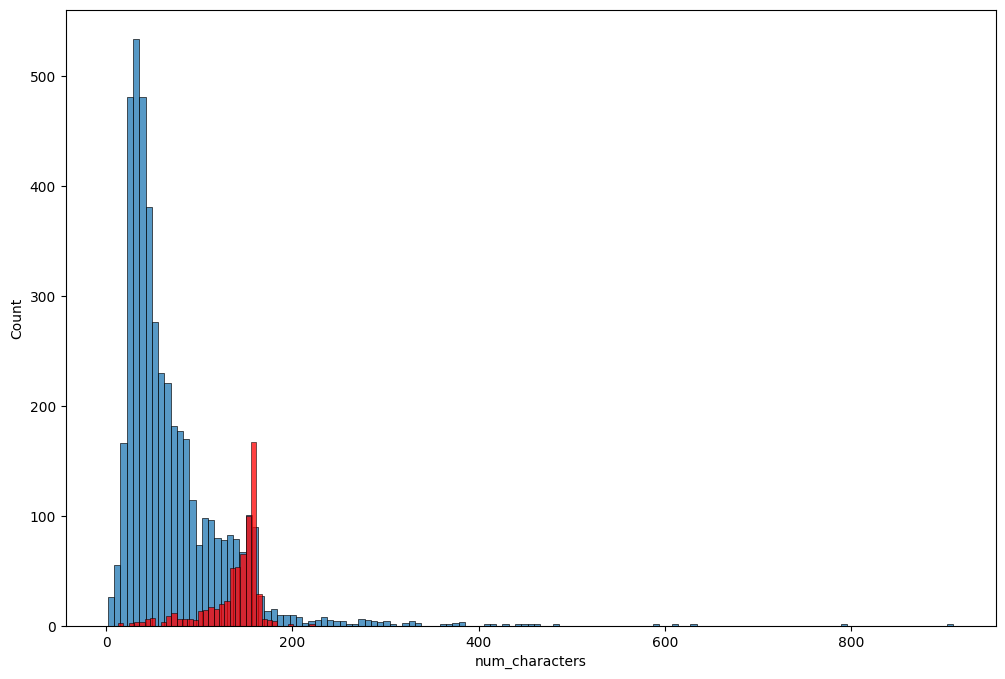

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

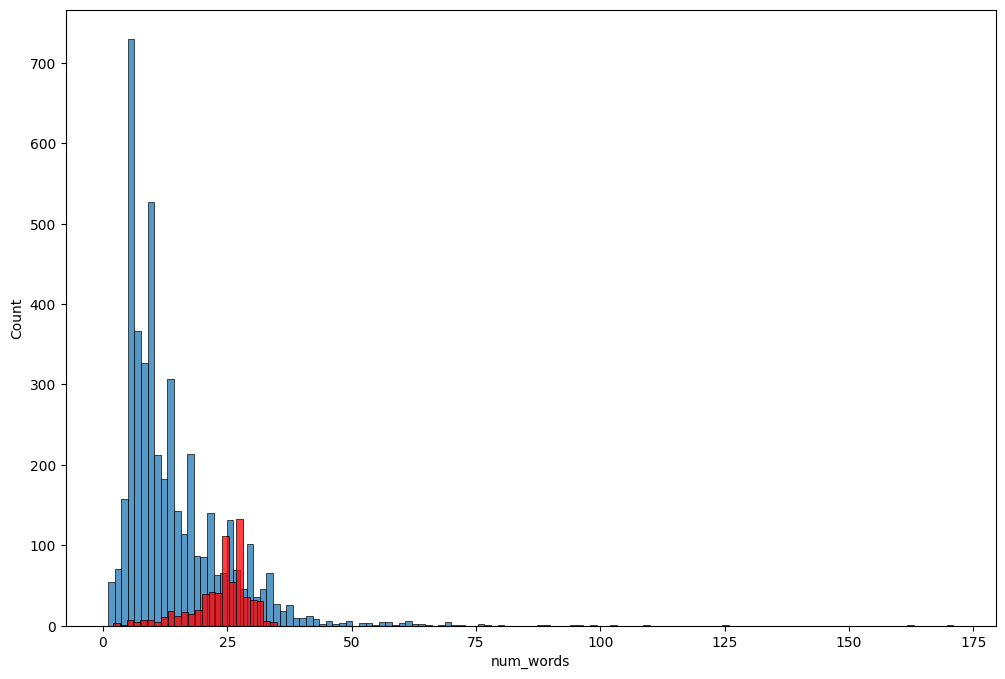

In [36]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

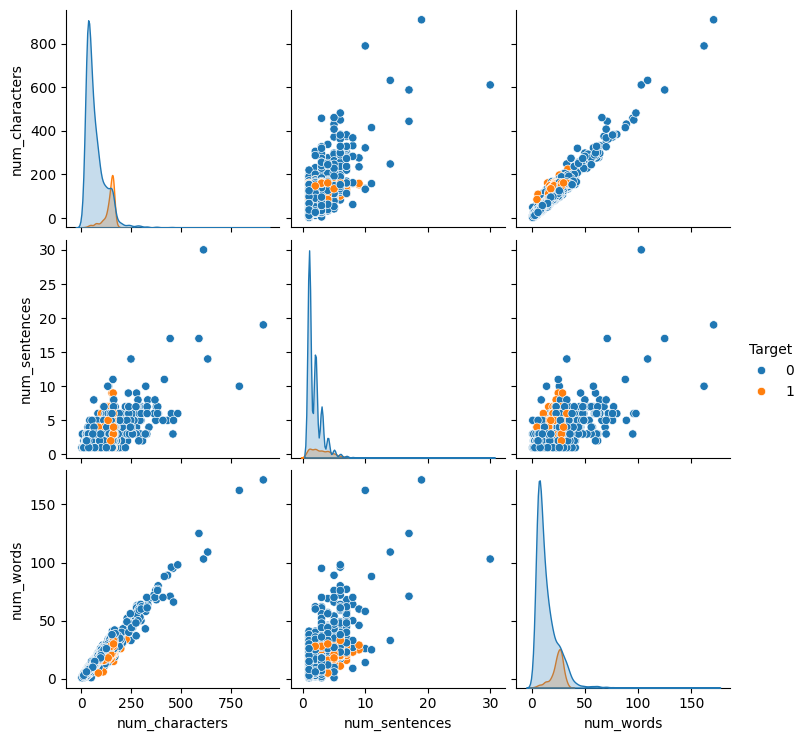

In [37]:
sns.pairplot(df,hue='Target')

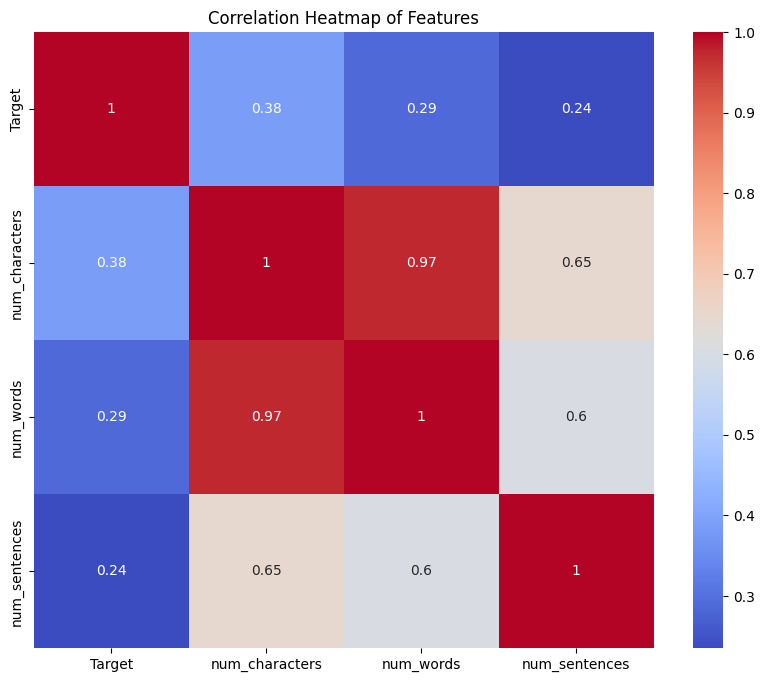

In [38]:
# Create correlation heatmap using only numeric columns
numeric_cols = ['Target', 'num_characters', 'num_words', 'num_sentences']
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

## Data Preprocessing
. Lower case
.Tokenization
.Removing special Characters
.Removing stop words and punctuation
.Stemming

In [39]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download stopwords if not already downloaded
nltk.download('stopwords')

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize using TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()
    text = tokenizer.tokenize(text)
    
    # Remove special characters and numbers
    text = [word for word in text if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    # Stemming
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    
    return " ".join(text)

# Test the function
print(transform_text('I loved to played cricket and football back in my childhood. How about you?'))

love play cricket footbal back


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
df['transform_text']=df['Text'].apply(transform_text)

In [41]:
df.head(5)

,Target,Text,num_characters,num_sentences,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,3,20,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,2,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,2,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,13,nah think goe usf live around though


In [42]:
import sys
!{sys.executable} -m pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


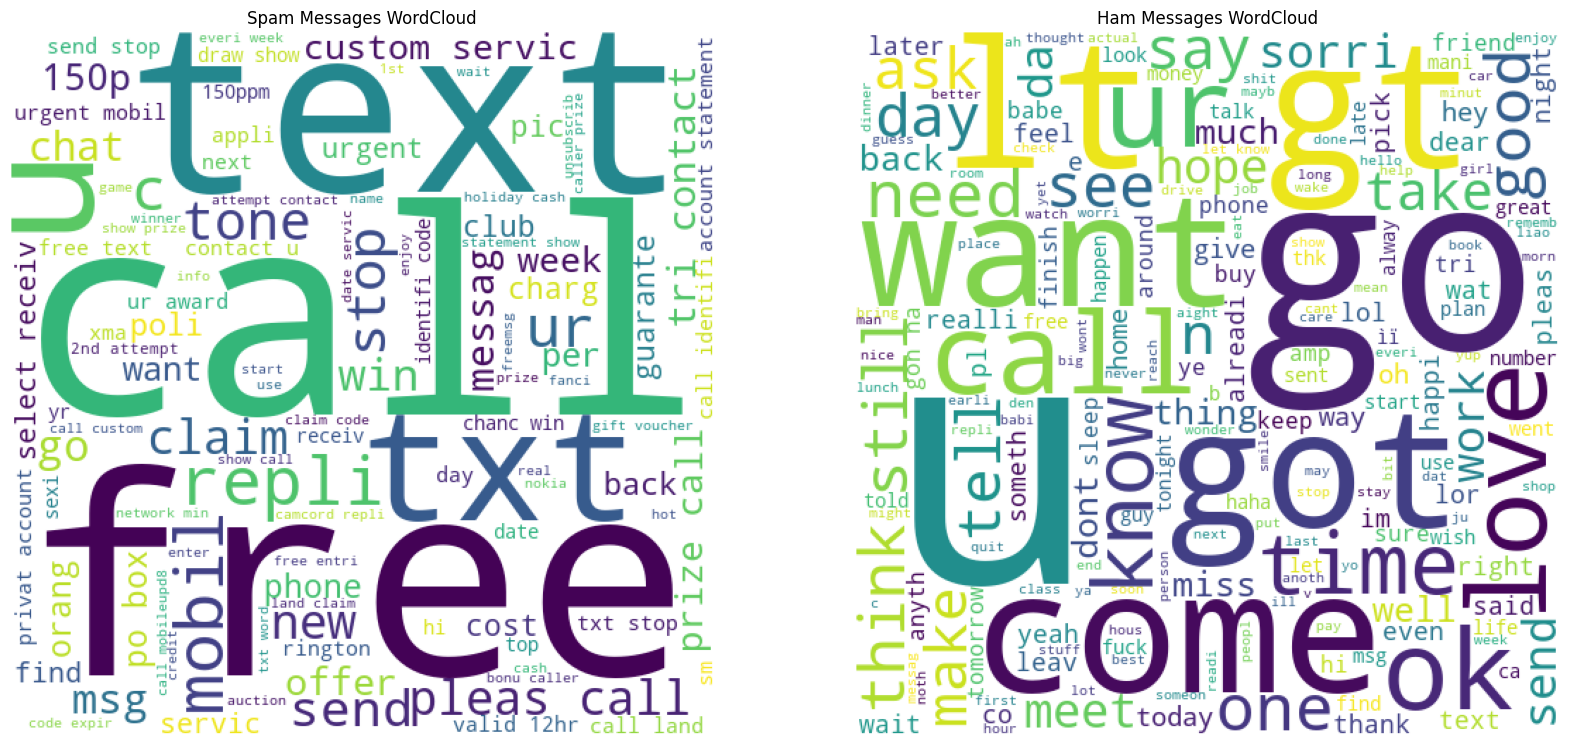

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create word cloud object
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate word clouds
spam_corpus = ' '.join(df[df['Target']==1]['transform_text'])
ham_corpus = ' '.join(df[df['Target']==0]['transform_text'])

# Create separate word clouds for spam and ham messages
plt.figure(figsize=(20,10))

# Spam word cloud
plt.subplot(1,2,1)
spam_wordcloud = wc.generate(spam_corpus)
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.title('Spam Messages WordCloud')

# Ham word cloud
plt.subplot(1,2,2)
ham_wordcloud = wc.generate(ham_corpus)
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.title('Ham Messages WordCloud')

plt.show()

In [44]:
df.head(5)

,Target,Text,num_characters,num_sentences,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,3,20,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,2,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,2,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,13,nah think goe usf live around though


In [45]:
spam_corpus=[]
for msg in df[df['Target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9339

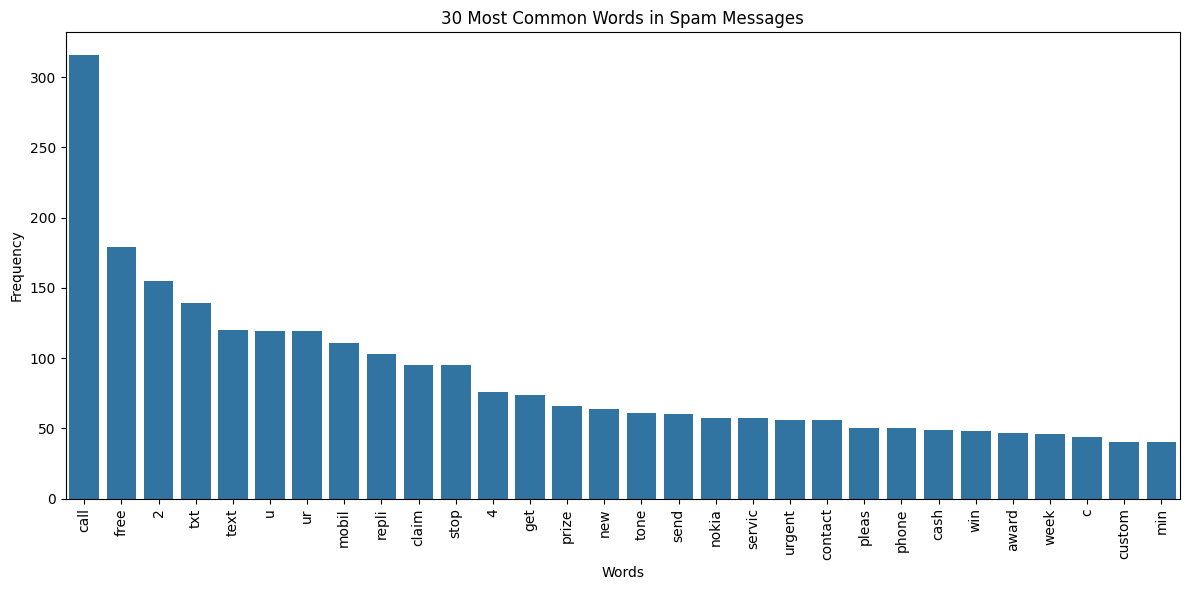

In [47]:
import seaborn as sns
from collections import Counter

# Get the most common words and convert to DataFrame
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Count', data=word_freq)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.title('30 Most Common Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

33008


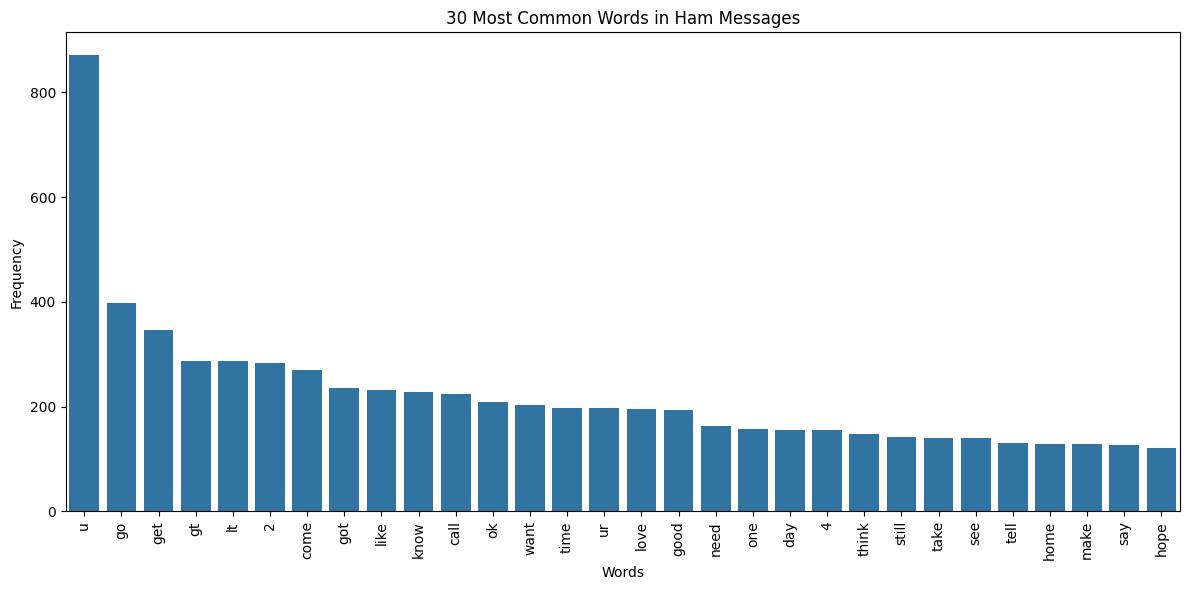

In [48]:
# Create corpus for ham messages
ham_corpus = []
for msg in df[df['Target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

# Check length of ham corpus
print(len(ham_corpus))

# Create visualization of most common words
import seaborn as sns
from collections import Counter

# Get the most common words and convert to DataFrame 
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Count', data=word_freq)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.title('30 Most Common Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [49]:
df.head(5)

,Target,Text,num_characters,num_sentences,num_words,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,3,20,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,2,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,28,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,2,11,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,13,nah think goe usf live around though


## Model Building

In [50]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [51]:
# Create CountVectorizer object
cv = CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
# Fit and transform the text data
x = tfidf.fit_transform(df['transform_text']).toarray()

In [52]:
x.shape

(5169, 3000)

In [53]:
y=df['Target'].values

In [54]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb= GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8568665377176016
[[774 122]
 [ 26 112]]
0.47863247863247865


In [60]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9700193423597679
[[896   0]
 [ 31 107]]
1.0


In [61]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9787234042553191
[[894   2]
 [ 20 118]]
0.9833333333333333


In [62]:
#tfidf --MNB

In [63]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))